### Computational Guided Inquiry for PChem (Neshyba & Guasco, 2022)

# Probability Densities

## Mathematical formulation

A probability density function describes the relative likelihood of a continuous random variable having a given value. For example, we can use the Boltzmann density function, $f_B$, to describe the x, y, or z-component of the velocity ($v_x$, $v_y$, or $v_z$). In addition to a velocity component, this function also depends on the temperature (*T*) and the molar mass of the molecule (*M*); we say it is *parameterized* by these quantitites.  The Boltzmann density function can be written as

$$
f_B(v_x) = N_Be^{-{ ( {\frac{M}{2RT}}} ) {v_x^2}} \ \ \ \   (1)  
$$

where we have written it as a function of the x-direction velocity component, $v_x$ (the y- and z-forms look very similar). The quantity $N_B$ is a normalization constant,

$$
N_B = {\big( {\frac{M}{2 \pi RT}} \big)}^{1/2}  \ \ \ \ (2)
$$

Similarly, the Maxwell density function is written

$$
f_M(v) = N_Mv^2e^{-{( \frac{M}{2RT}} ) {v^2}} \ \ \ \ (3)
$$

with a normalization constant of

$$
N_M = 4 \pi \big( {{\frac{M}{2 \pi RT}} \big)}^{3/2} \ \ \ \ (4) 
$$

For a given molar mass, we can think of these functions as surfaces in two dimensions, (1) the velocity component or speed and (2) the temperature. A shorthand for these surfaces would be $f_B(v_x,T)$ or $f_M(v,T)$.  What do such surfaces look like?  One is shown in the figure below.  Such figures are useful for developing an intuition about how molecules move; for example, it is evident from the figure that molecules exhibit a broader distribution of velocities at higher temperature.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/fbsurface.png" height="700" width="700"/>  

<p style='text-align: center;'>
<strong>Figure 1</strong>. Probability density as a function of velocity and temperature.
        
## Units
As it turns out, the dimensions of $f_B$ and $f_M$ are the same: it's the inverse of speed. There's a reason for that, that we'll get to later. For now we'll just note that it'll be convenient to use SI for the calculations here, which means the units of $f_B$ and $f_M$ will be $s/m$. As you'll see below, we'll be doing some conversions on occasion to make sure this is the case.

## Learning Goals
1. Explain the difference between a velocity component ($v_x$, $v_y$, or $v_z$) and a speed ($v$), including the physically possible ranges of each.
1. Explain which probability density ($f_B$ or $f_M$) is appropriate for which. 
1. Calculate $f_B(v_x)$ and $f_M(v)$.
1. Sketch $f_B(v_x)$ and $f_M(v)$, including how they change at higher temperatures. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import PchemLibrary as PL

In [2]:
%matplotlib notebook

### Assign the following values using AssignQuantity
    
    n should be 1 mole
    R should be 8.314 J/(mol K)
    M should be 0.028 kg/mol (The molar mass N2, in SI units)

In [3]:
# n
### BEGIN SOLUTION
n = AssignQuantity(1,"mol")
print(n)
### END SOLUTION

# R
### BEGIN SOLUTION
R = AssignQuantity(8.314, "J/(mol K)")
print(R)
### END SOLUTION


# Mass in g/mol (converting to SI)
### BEGIN SOLUTION
M = AssignQuantity(28,'g/mol')
M.ito_base_units()
print(M)
### END SOLUTION

1 mole
8.314 joule / kelvin / mole
0.028 kilogram / mole


### Calculating $f_B(T, v_x)$

To calculate the Boltzmann probability density, we have to specify some parameters; the units are all SI.

In [4]:
# Temperature
T = AssignQuantity(298, "K")
print(T)

# Velocity component in the x-direction
vx = AssignQuantity(500,"m/s")
print(vx)

# Here's the exponential D-factor
D = M/(2*R*T)
print(D)

# Here's the normalization constant
NB = np.sqrt(M/(2*np.pi*R*T))
print(NB)

# Now the Boltzmann function
fB = NB * np.exp(-D*vx**2)
print(fB)

# This converts fB into seconds/meter (should be numerically equal to base units)
fB.ito("s/m")
print(fB)

298 kelvin
500 meter / second
5.6506935015410245e-06 kilogram / joule
0.0013411456316653346 kilogram ** 0.5 / joule ** 0.5
0.0003265575188853833 kilogram ** 0.5 / joule ** 0.5
0.0003265575188853832 second / meter


### Your turn
OK, do the same for $f_M(T,v)$. Differences will be: 

- Instead of a velocity component, we need a speed ("v") of $500 \ {m\over s}$. Do this using AssignQuantity.
- There's a different normalization constant (see the introduction)
- As with fB, convert fM to seconds/meter 

In [5]:
# Temperature
### BEGIN SOLUTION
T = AssignQuantity(298, "K")
print(T)
### END SOLUTION

# Speed in the x-direction
### BEGIN SOLUTION
v = AssignQuantity(500,"m/s")
print(v)
### END SOLUTION

# D, NM, and fM
### BEGIN SOLUTION
D = M/(2*R*T)
NM = 2**.5*M**(3/2)*R**(-3/2)*T**(-3/2)*np.pi**(-0.5)
fM= NM*v**2*np.exp(-D*v**2)
print(fM)
### END SOLUTION

# Convert fM to SI units (s/m)
### BEGIN SOLUTION
fM.ito("s/m")
print(fM)
### END SOLUTION

298 kelvin
500 meter / second
0.0018452764498449957 kilogram ** 1.5 * meter ** 2 / joule ** 1.5 / second ** 2
0.0018452764498449957 second / meter


### Visualizing $f_B(T,v_x)$
Our next objective is to get Python to display the probability density function $f_B(T,v_x)$. Also, we've tried to keep the variable names as simple as possible, but just just to be clear, the variables T, vx, D, NB, and fB are all *grids* here.

shape of fB= (40, 60)


<IPython.core.display.Javascript object>


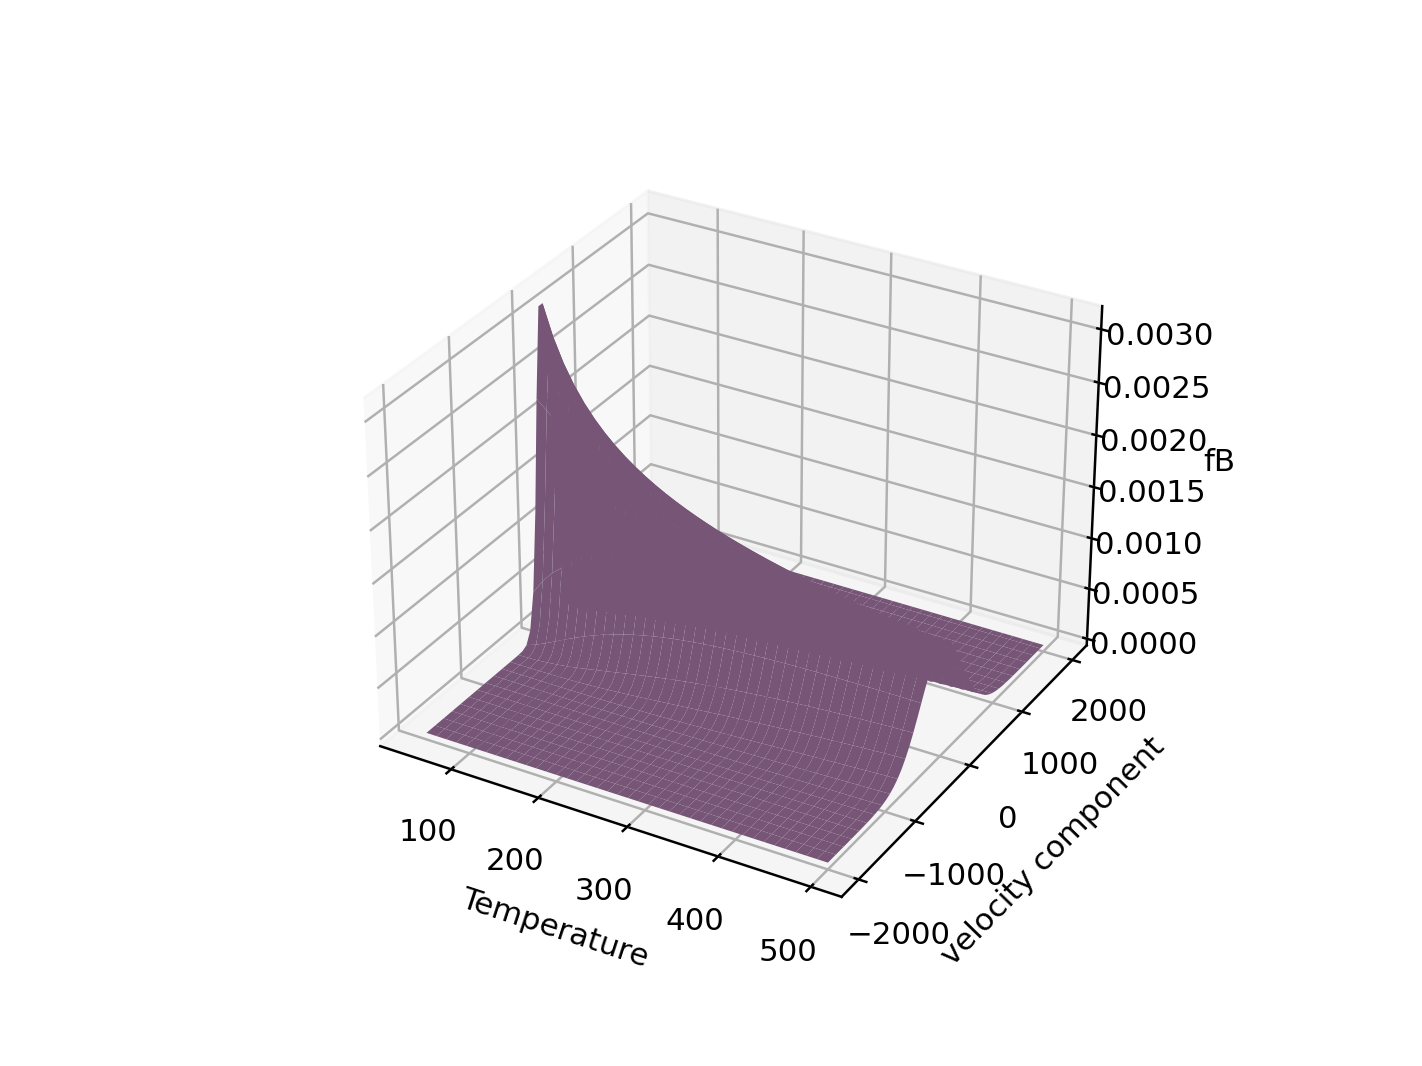

Text(0.5, 0, 'fB')

In [6]:
# Make the grids, with units
T,vx = PL.Statespace([50,500,40],[-2000,2000,60])
T = AssignQuantity(T,"K")
vx = AssignQuantity(vx,"m/s")

# Calculate "D" and the normalization constant as grids
D = M/(2*R*T)
NB = np.sqrt(M/(2*np.pi*R*T))

# Get the probability density for every point on the grid
fB = NB * np.exp(-D*vx**2)
print("shape of fB=",np.shape(fB))

# Prepping the axis labels
xlabel = "Temperature"
ylabel = "velocity component"
zlabel = "fB"

# Graph the probability density
ax = PL.plot_surface(T, vx, fB, color='plum') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your turn
Now do something similar, but for $f_M(T,v)$. There will be some changes you'll need to pay attention to, mainly about the speed. The main point is, speeds are, by definition, non-negative (you can't ride a bicycle car at "-10 mph". Because of this, your state space should specify speeds from 0 to 2000 m/s.

Just to help keep track of the names of all these (all for the Maxwell distribution):

- T is a grid of temperatures 
- v is a grid of speeds
- DM is a grid of D-values
- NM is a grid of normalization constants
- fM is a grid of probability densities

7.331948686325977e-08 kilogram ** 1.5 / joule ** 1.5
shape of fM= (40, 60)


<IPython.core.display.Javascript object>


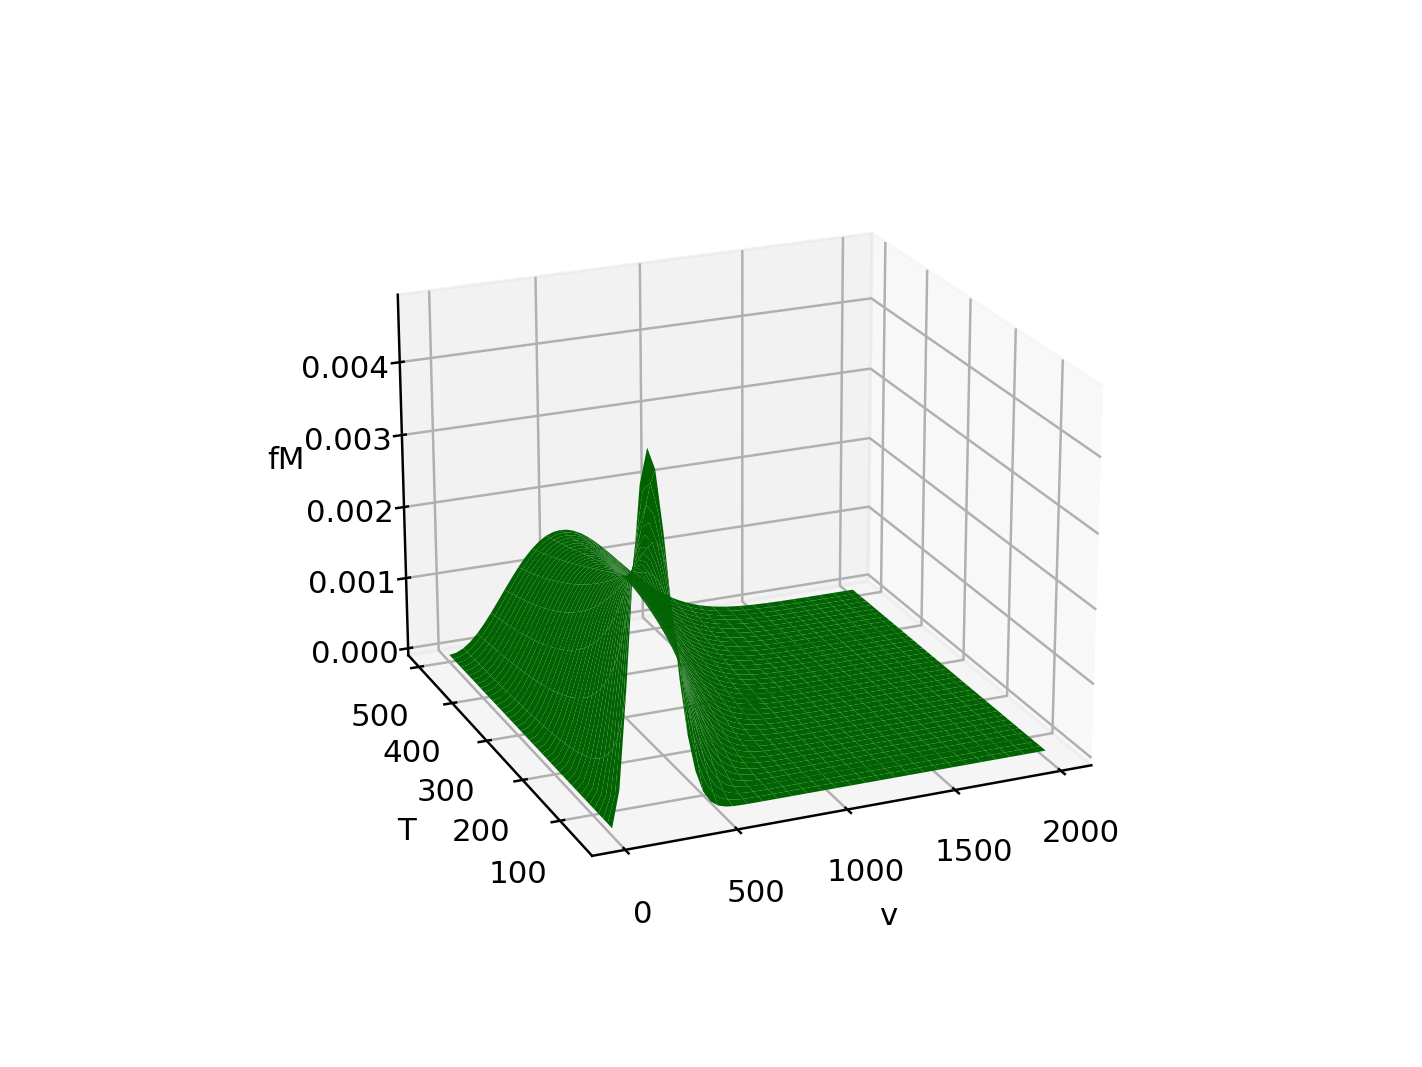

In [7]:
# Make T and v as grids using PL.Statespace, with units
### BEGIN SOLUTION
T,v = PL.Statespace([50,500,40],[0,2000,60])
T = AssignQuantity(T,"K")
v = AssignQuantity(v,"m/s")
### END SOLUTION

# Calculate grids of the exponential factor and the normalization constant
### BEGIN SOLUTION
DM = M/(2*R*T)
# NM = 2**.5*M**(3/2)*R**(-3/2)*T**(-3/2)*np.pi**(-0.5)
# print(NM[10,10])
NM = 4*np.pi*(M/(2*np.pi*R*T))**(3/2)

print(NM[10,10])
### END SOLUTION

# Get the probability density for every speed and temperature on the grid
### BEGIN SOLUTION
fM= NM*v**2*np.exp(-DM*v**2)
print("shape of fM=",np.shape(fM))
### END SOLUTION

# Prep the axis labels
xlabel = "v"
ylabel = "T"
zlabel = "fM"

# Graph the pressure
### BEGIN SOLUTION
ax = PL.plot_surface(v, T, fM, color='green') # Make the mesh plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

Savinghere = False
if Savinghere:
    np.savetxt('.TM.txt',T)
    np.savetxt('.vx.txt',vx)
    np.savetxt('.v.txt',v)
    np.savetxt('.fB.txt',fB)
    np.savetxt('.fM.txt',fM)

Savingthere = False
if Savingthere:
    np.savetxt('../Week_3b.MomentsAndAverages/TM.txt',T)
    np.savetxt('../Week_3b.MomentsAndAverages/vx.txt',vx)
    np.savetxt('../Week_3b.MomentsAndAverages/v.txt',v)
    np.savetxt('../Week_3b.MomentsAndAverages/fB.txt',fB)
    np.savetxt('../Week_3b.MomentsAndAverages/fM.txt',fM)
### END SOLUTION

### Pause for Analysis
In your paper notebook, sketch $f_B(T,v_x)$ and $f_M(T,v)$, with axes labeled.

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page